# Лабараторная №7

## Вариант 13

##### Найти точку минимума функции 
##### f(x1, x2) = (x1)^2 − 2*(x1)+ 2*(x2)^2 − 32*(x2) + 134.5,
#####                    [x1= 1, x2=−6].
##### Методом покоординатного спуска. Для одномерной минимизации использовать метод квадратичной интерполяции. Для поиска интервала унимодальности использовать алгоритм Свенна.

Минимальное значение f =  5.5


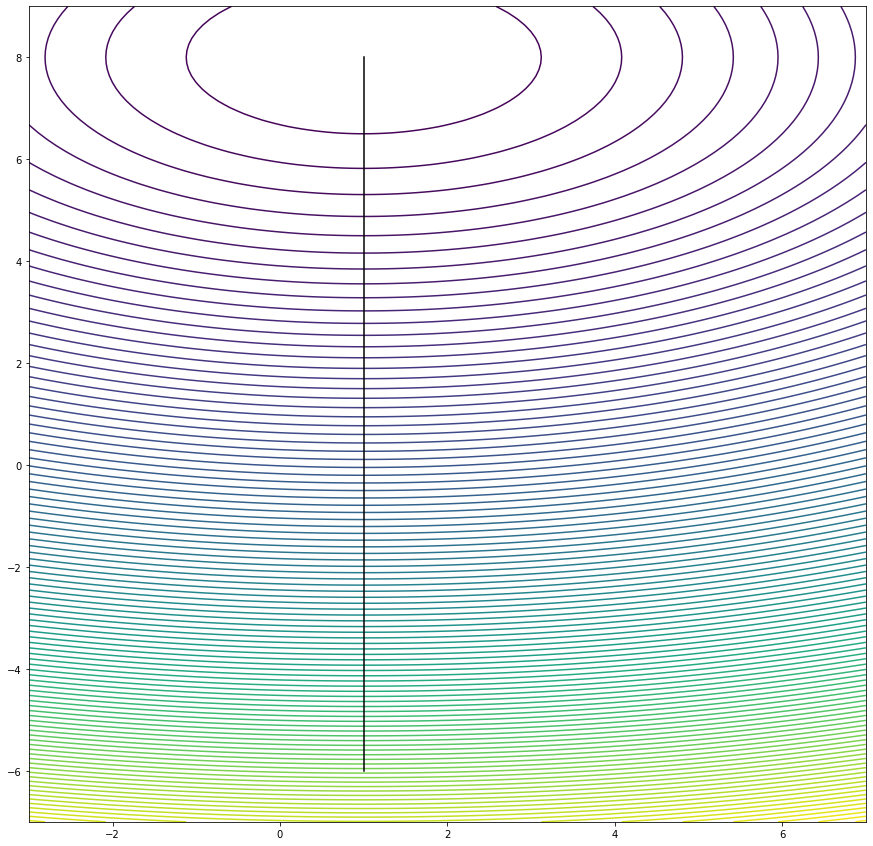

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import matplotlib.patches
import matplotlib.lines
import matplotlib.path

def f(x1,x2):
    f = x1 ** 2 - 2 * x1 + 2 * x2 ** 2 - 32 * x2 + 134.5
    return f

#Метод Свена
def m_Svena_for_x1(x1,x2):
    hs = 0.001; # шаг
    x11 = x1 + hs;
    fs1 = f(x11,x2)
    if f(x1,x2) < f(x11,x2):
        hs = (-1) * hs;
        x11 = x1 + hs;
        fs2 = f(x11,x2)
        if abs(fs1 - fs2) < 0.001:
            return('min',x1)
    while f(x1,x2) > f(x11,x2):
        x0 = x1;
        x1 = x11;
        x11 = x1 + hs;
        hs = 2 * hs;  
    return (x0,x11) 

def m_Svena_for_x2(x1,x2):
    h = 0.001; # шаг
    x22 = x2 + h;
    fs1 = f(x1,x22)
    if f(x1,x2) < f(x1,x22):
        h = -h;
        x22 = x2 + h;
        fs2 = f(x1,x22)
        if abs(fs1 - fs2) < 0.001:
            return('min',x1)
    while f(x1,x2) > f(x1,x22):
        x0 = x2;
        x2 = x22;
        x22 = x2 + h;
        h = 2 * h;  
    return (x0,x22) 

# Метод квадратичной интерполяции
def kvadra_intro(x1,x2,k):
    E = 0.001;
    h = 1
    if k == True:
        if m_Svena_for_x1(x1, x2)[0] == ('min'):
            return(m_Svena_for_x1(x1, x2)[1])
        a = m_Svena_for_x1(x1, x2)[0];
        b = m_Svena_for_x1(x1, x2)[1];
        t0 = a
        t1 = a + h
        t2 = a + 2*h
        f0 = f(t0,x2)
        f1 = f(t1,x2)
        f2 = f(t2,x2)
        x = (f0 * (2*t1 + h) - 4*f1*t1 + f2*(2 * t1 - h))/(2*(f0 - 2*f1 + f2)) 
        while abs(x - t1) < E:
            t0 = t1
            t1 = t2
            t2 = t1 + h 
            f0 = f(t0,x2)
            f1 = f(t1,x2)
            f2 = f(t2,x2)
            x = (f0 * (2*t1 + h) - 4*f1*t1 + f2*(2 * t1 - h))/(2*(f0 - 2*f1 + f2))   
    else:
        if m_Svena_for_x2(x1, x2)[0] == ('min'):
            return(m_Svena_for_x2(x1, x2)[1])
        a = m_Svena_for_x2(x1, x2)[0];
        b = m_Svena_for_x2(x1, x2)[1];
        t0 = a
        t1 = a + h
        t2 = a + 2*h
        f0 = f(x1,t0)
        f1 = f(x1,t1)
        f2 = f(x1,t2)
        x = (f0 * (2*t1 + h) - 4*f1*t1 + f2*(2 * t1 - h))/(2*(f0 - 2*f1 + f2)) 
        while abs(x - t1) < E:
            t0 = t1
            t1 = t2
            t2 = t1 + h 
            f0 = f(t0,x2)
            f1 = f(t1,x2)
            f2 = f(t2,x2)
            x = (f0 * (2*t1 + h) - 4*f1*t1 + f2*(2 * t1 - h))/(2*(f0 - 2*f1 + f2))
    return x   

E = 0.001
x1 = 1
a = x1
x2 = -6
b = x2
k = True
m1 = kvadra_intro(x1, x2, k)
k = False 
m2 = kvadra_intro(x1, x2, k)

# Покоординатный спуск
while abs(m1-m2) > E:
    x1 = m1
    x2 = m2
    k = True
    m1 = kvadra_intro(x1, x2, k)
    k = False 
    m2 = kvadra_intro(x1, x2, k)

print("Минимальное значение f = ",f(x1,x2))     

#Рисуем 
x, y = np.mgrid[-3:7:130j, -7:9:130j]
f = x ** 2 - 2 * x + 2 * y ** 2 - 32 * y + 134.5  
fig, ax = plt.subplots()
ax.contour(x,y,f, levels = 100)
fig.set_figwidth(15)
fig.set_figheight(15)

line = matplotlib.lines.Line2D (X1, X2, color="k")
ax.add_line (line)
plt.show()